In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score

In [2]:
wine_quality = pd.read_csv('winequality-red.csv', sep = ';')
wine_quality.rename( columns = lambda x: x.replace(" ", "_"), inplace = True)
eda_columns = ['volatile_acidity','chlorides','sulphates','alcohol','quality']
sns.set(style='whitegrid', context='notebook')

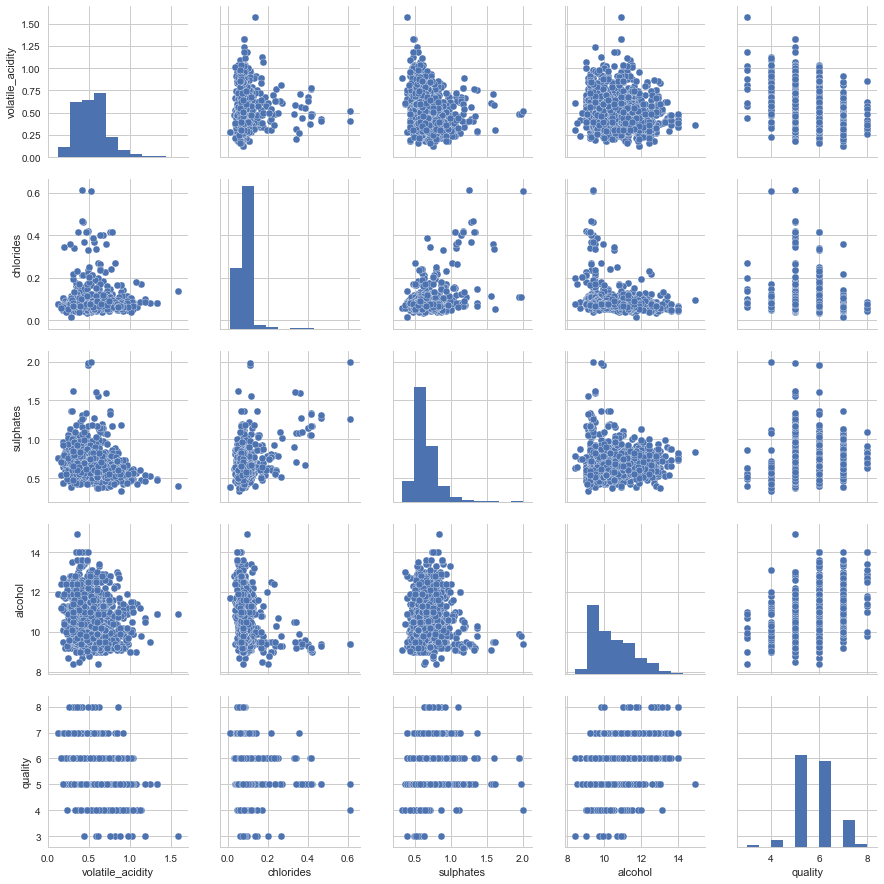

In [3]:
sns.pairplot(wine_quality[eda_columns], size = 2.5, x_vars = eda_columns , y_vars = eda_columns)
plt.show()

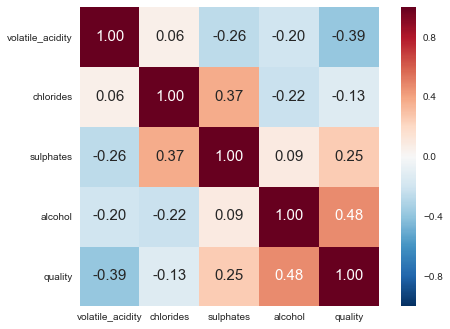

In [4]:
#correlation coefficient 
corr_mat = np.corrcoef(wine_quality[eda_columns].values.T)
sns.set(font_scale=1)
full_mat = sns.heatmap(corr_mat,cbar=True,annot =True, square=True, fmt='.2f', annot_kws={'size':15},yticklabels=eda_columns,xticklabels=eda_columns)
plt.show()

In [38]:
columns = [ 'volatile_acidity', 'chlorides', 'free_sulfur_dioxide','total_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']

pdx = wine_quality[columns]
pdy = wine_quality['quality']


In [39]:
x_train,x_test,y_train,y_test = train_test_split(pdx, pdy, train_size=0.7, random_state=42)
x_train_new = sm.add_constant(x_train)
x_test_new = sm.add_constant(x_test)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_train_new.shape, x_test_new.shape)

(1119, 7) (1119,)
(480, 7) (480,)
(1119, 8) (480, 8)


In [40]:
full_mod = sm.OLS(y_train,x_train_new)
full_res = full_mod.fit()
print('\n\n', full_res.summary())



                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     89.21
Date:                Sun, 12 Apr 2020   Prob (F-statistic):          4.31e-103
Time:                        21:37:56   Log-Likelihood:                -1104.7
No. Observations:                1119   AIC:                             2225.
Df Residuals:                    1111   BIC:                             2266.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
const                    3.92

In [41]:
print("\n Variance Inflation Factor")
cnames = x_train.columns 
for i in np.arange(0, len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train[yvar], sm.add_constant(x_train_new[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar, round(vif,3))


 Variance Inflation Factor
volatile_acidity 1.243
chlorides 1.317
free_sulfur_dioxide 1.878
total_sulfur_dioxide 1.956
pH 1.236
sulphates 1.322
alcohol 1.225
